In [5]:
import pandas as pd

In [6]:
nba_data=pd.read_csv('shot_logs.csv')

In [7]:
import numpy as np

In [8]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [9]:
import pandas as pd
cols = ['FINAL_MARGIN','SHOT_NUMBER','PERIOD','DRIBBLES','TOUCH_TIME','SHOT_DIST','PTS_TYPE','CLOSE_DEF_DIST','FGM','PTS','SHOT_RESULT']
dataf = pd.read_csv('shot_logs.csv')
df=dataf[cols]
df.tail()


,FINAL_MARGIN,SHOT_NUMBER,PERIOD,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PTS,SHOT_RESULT
128064,-16,5,3,5,6.2,8.7,2,0.8,0,0,missed
128065,-16,6,4,4,5.2,0.6,2,0.6,1,2,made
128066,-16,7,4,2,4.2,16.9,2,4.2,1,2,made
128067,-16,8,4,4,4.5,18.3,2,3.0,0,0,missed
128068,-16,9,4,5,4.7,5.1,2,2.3,1,2,made


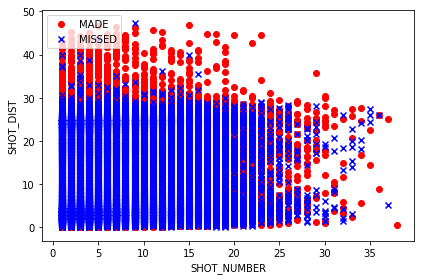

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:, 10].values

y = np.where(y == 'missed',-1, 1)
X=df.iloc[0:,[1,5]].values
# extract sepal length and petal length
X_missed = df.loc[(df['SHOT_RESULT'] == 'missed')]
X_made = df.loc[(df['SHOT_RESULT'] == 'made')]

X_missed=X_missed.iloc[0:,[1,5]].values
X_made=X_made.iloc[0:,[1,5]].values
# plot data
plt.scatter(X_missed[0:, 0], X_missed[0:, 1],
            color='red', marker='o', label='MADE')
plt.scatter(X_made[0:, 0], X_made[0:, 1],
            color='blue', marker='x', label='MISSED')

plt.xlabel('SHOT_NUMBER')
plt.ylabel('SHOT_DIST')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./iris_1.png', dpi=300)
plt.show()


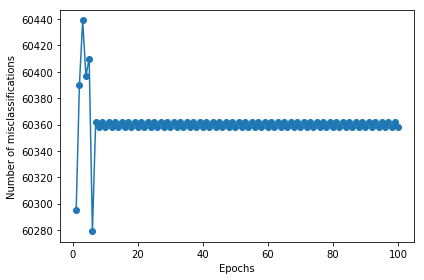

In [42]:

ppn = Perceptron(eta=0.001, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()


In [43]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

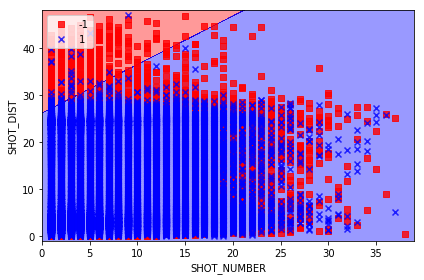

In [45]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('SHOT_NUMBER')
plt.ylabel('SHOT_DIST')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()